<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(1_2)_n20_01_ipynb1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.014507,36.748281,76.172083,-2.585454,147.349417,151.260166,-3.910750
1,0.0,1.0,54.184983,68.692260,80.434445,10.790191,224.101879,212.747007,11.354873
2,0.0,2.0,74.815752,67.254373,79.013553,-3.089721,227.993956,227.645593,0.348363
3,0.0,3.0,86.067168,59.493031,21.920035,26.271482,203.751715,179.822243,23.929472
4,0.0,4.0,77.644617,32.281041,38.640408,0.586000,159.152066,157.548207,1.603859
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.428637,31.043319,58.527285,6.263178,171.262420,172.170094,-0.907674
19996,999.0,16.0,59.848544,88.267793,90.588043,0.144942,248.849323,248.521688,0.327634
19997,999.0,17.0,95.074489,20.982394,70.948616,12.162555,209.168054,207.167636,2.000418
19998,999.0,18.0,31.473663,61.754588,51.166493,11.588973,165.983716,155.756908,10.226808


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.014507,36.748281,76.172083,-2.585454,147.349417,151.260166,-3.910750
1,0.0,1.0,54.184983,68.692260,80.434445,10.790191,224.101879,212.747007,11.354873
2,0.0,2.0,74.815752,67.254373,79.013553,-3.089721,227.993956,227.645593,0.348363
3,0.0,3.0,86.067168,59.493031,21.920035,26.271482,203.751715,179.822243,23.929472
4,0.0,4.0,77.644617,32.281041,38.640408,0.586000,159.152066,157.548207,1.603859
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.428637,31.043319,58.527285,6.263178,171.262420,172.170094,-0.907674
19996,999.0,16.0,59.848544,88.267793,90.588043,0.144942,248.849323,248.521688,0.327634
19997,999.0,17.0,95.074489,20.982394,70.948616,12.162555,209.168054,207.167636,2.000418
19998,999.0,18.0,31.473663,61.754588,51.166493,11.588973,165.983716,155.756908,10.226808


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    27.014507  36.748281  76.172083  ...  147.349417  151.260166  -3.910750
      1.0    54.184983  68.692260  80.434445  ...  224.101879  212.747007  11.354873
      2.0    74.815752  67.254373  79.013553  ...  227.993956  227.645593   0.348363
      3.0    86.067168  59.493031  21.920035  ...  203.751715  179.822243  23.929472
      4.0    77.644617  32.281041  38.640408  ...  159.152066  157.548207   1.603859
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   65.428637  31.043319  58.527285  ...  171.262420  172.170094  -0.907674
      16.0   59.848544  88.267793  90.588043  ...  248.849323  248.521688   0.327634
      17.0   95.074489  20.982394  70.948616  ...  209.168054  207.167636   2.000418
      18.0   31.473663  61.754588  51.166493  ...  165.983716  155.756908  10.226808
      19.0   82.677852  34.343922  69.682362  ...  199.478113  204.482288  -5.004176

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    27.014507  36.748281  76.172083  ...  147.349417  151.260166  -3.910750
      1.0    54.184983  68.692260  80.434445  ...  224.101879  212.747007  11.354873
      2.0    74.815752  67.254373  79.013553  ...  227.993956  227.645593   0.348363
      3.0    86.067168  59.493031  21.920035  ...  203.751715  179.822243  23.929472
      4.0    77.644617  32.281041  38.640408  ...  159.152066  157.548207   1.603859
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   65.428637  31.043319  58.527285  ...  171.262420  172.170094  -0.907674
      16.0   59.848544  88.267793  90.588043  ...  248.849323  248.521688   0.327634
      17.0   95.074489  20.982394  70.948616  ...  209.168054  207.167636   2.000418
      18.0   31.473663  61.754588  51.166493  ...  165.983716  155.756908  10.226808
      19.0   82.677852  34.343922  69.682362  ...  199.478113  204.482288  -5.004176

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.014507,36.748281,76.172083,-2.585454,147.349417,151.260166,-3.910750
1,0.0,1.0,54.184983,68.692260,80.434445,10.790191,224.101879,212.747007,11.354873
2,0.0,2.0,74.815752,67.254373,79.013553,-3.089721,227.993956,227.645593,0.348363
3,0.0,3.0,86.067168,59.493031,21.920035,26.271482,203.751715,179.822243,23.929472
4,0.0,4.0,77.644617,32.281041,38.640408,0.586000,159.152066,157.548207,1.603859
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.428637,31.043319,58.527285,6.263178,171.262420,172.170094,-0.907674
19996,999.0,16.0,59.848544,88.267793,90.588043,0.144942,248.849323,248.521688,0.327634
19997,999.0,17.0,95.074489,20.982394,70.948616,12.162555,209.168054,207.167636,2.000418
19998,999.0,18.0,31.473663,61.754588,51.166493,11.588973,165.983716,155.756908,10.226808


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    27.014507  36.748281  76.172083  ...  147.349417  151.260166  -3.910750
      1.0    54.184983  68.692260  80.434445  ...  224.101879  212.747007  11.354873
      2.0    74.815752  67.254373  79.013553  ...  227.993956  227.645593   0.348363
      3.0    86.067168  59.493031  21.920035  ...  203.751715  179.822243  23.929472
      4.0    77.644617  32.281041  38.640408  ...  159.152066  157.548207   1.603859
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   65.428637  31.043319  58.527285  ...  171.262420  172.170094  -0.907674
      16.0   59.848544  88.267793  90.588043  ...  248.849323  248.521688   0.327634
      17.0   95.074489  20.982394  70.948616  ...  209.168054  207.167636   2.000418
      18.0   31.473663  61.754588  51.166493  ...  165.983716  155.756908  10.226808
      19.0   82.677852  34.343922  69.682362  ...  199.478113  204.482288  -5.004176

[20000 rows x 7 columns]

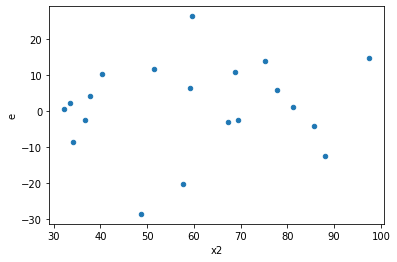

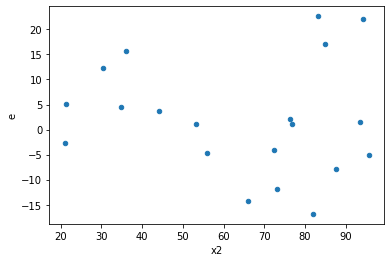

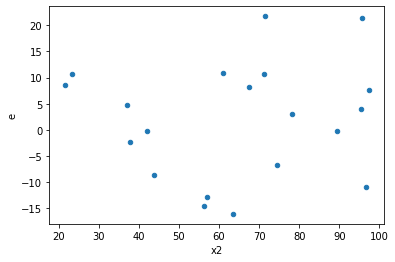

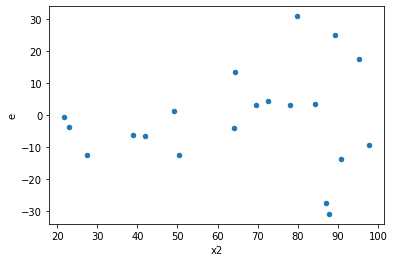

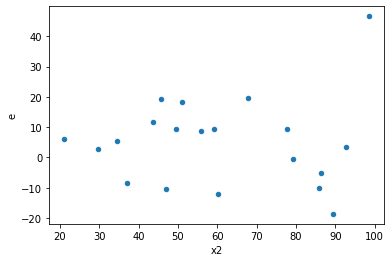

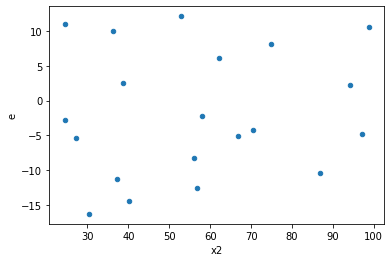

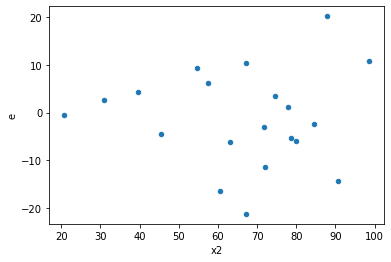

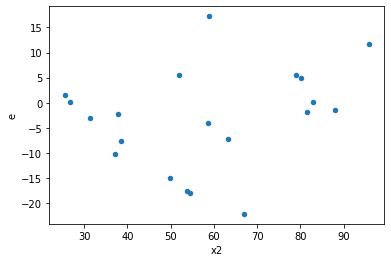

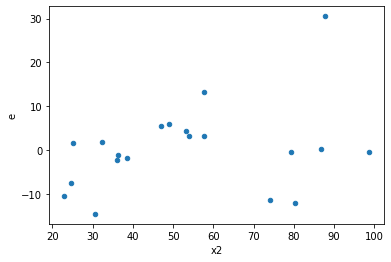

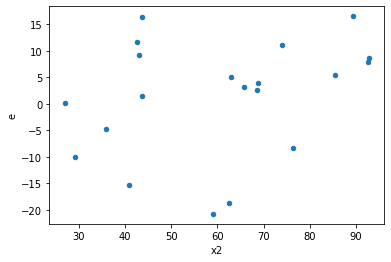

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,5.0,5.0,1470.6125823477125,70.3104604823146,367.65314558692813,17.57761512057865,20.915985647933855,0.004597875805180118,0.9977010620974099,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,276.52938463590635,43.08274882976988,69.13234615897659,10.77068720744247,6.418564092289916,0.06229327446882249,0.9688533627655888,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,2685.332937859835,140.12816044073682,671.3332344649588,35.032040110184205,19.16340676573371,0.005638228236030773,0.9971808858819846,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,1993.0918650095266,633.983277073176,498.27296625238165,158.495819268294,3.143760943050046,0.2343768677339486,0.8828115661330257,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,603.6656077831466,213.05104440464785,150.91640194578665,53.26276110116196,2.8334318166335972,0.2776413839808729,0.8611793080095635,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,1014.3594700657096,93.71381996240586,253.5898675164274,23.428454990601466,10.824011554247058,0.020586577951035023,0.9897067110244825,Reject001=1 : Homoscedasticity
11.0,5.0,5.0,266.967102195172,176.69558014233306,66.741775548793,44.173895035583264,1.5108872671298443,0.6616860868860981,0.669156956556951,Reject001=1 : Homoscedasticity
12.0,5.0,5.0,395.5683216259694,87.65307824561135,98.89208040649235,21.91326956140284,4.512885680039136,0.12373817668781784,0.9381309116560911,Reject001=1 : Homoscedasticity
13.0,5.0,5.0,297.7611566641428,124.50376330611101,74.4402891660357,31.125940826527753,2.3915835855664276,0.36056539824162837,0.8197173008791858,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,379.6081734557567,1097.8723204041523,94.90204336393917,274.4680801010381,0.3457671410424248,0.2686619678021855,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,1470.6125823477125,70.3104604823146,367.65314558692813,17.57761512057865,20.915985647933855,0.004597875805180118,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,276.52938463590635,43.08274882976988,69.13234615897659,10.77068720744247,6.418564092289916,0.06229327446882249,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,2685.332937859835,140.12816044073682,671.3332344649588,35.032040110184205,19.16340676573371,0.005638228236030773,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,1993.0918650095266,633.983277073176,498.27296625238165,158.495819268294,3.143760943050046,0.2343768677339486,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,279.9717823184762,702.9730360029696,69.99294557961905,175.7432590007424,0.3982681667427334,0.3351559496268322,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,603.6656077831466,213.05104440464785,150.91640194578665,53.26276110116196,2.8334318166335972,0.2776413839808729,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,178.69713117188724,268.8726660765866,44.67428279297181,67.21816651914665,0.664616205802737,0.6648598798789638,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,1014.3594700657096,93.71381996240586,253.5898675164274,23.428454990601466,10.824011554247058,0.020586577951035023,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      923
Reject001=0 : Heteroscedasticity     77
Name: Result_test, dtype: int64